# Python w analizie danych - regresja liniowa: statsmodels i seaborn



### Zadanie 1
Napisz funkcję, która obliczy współczynnik korelacji liniowej Pearsona. Nie używaj żadnych gotowych funkcji.

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()
df['X'] = [1, 2, 3, 4, 5]
df['Y'] = [4, 6, 9, 11, 18]
df

,X,Y
0,1,4
1,2,6
2,3,9
3,4,11
4,5,18


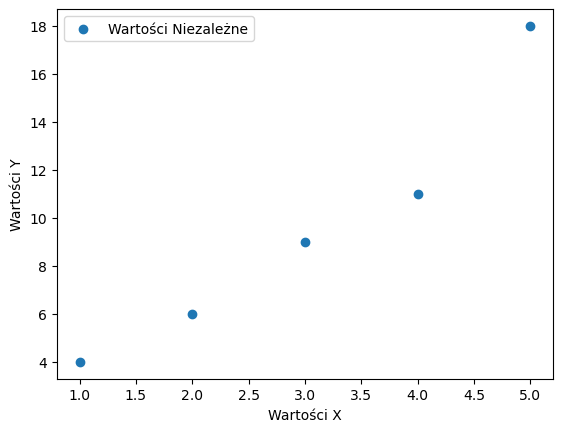

In [5]:
plt.scatter(df['X'], df['Y'], label='Wartości Niezależne')
plt.xlabel('Wartości X')
plt.ylabel('Wartości Y')
plt.legend()
plt.show()

In [6]:
def srednia(zbior):
    return float(zbior.sum()) / len(zbior)

Mx = srednia(df['X'])
My = srednia(df['Y'])

print("Mx: ", Mx)
print("My: ", My)

Mx:  3.0
My:  9.6


In [7]:
from math import sqrt

def odchylenie(zbior, srednia):
    licznik = 0
    for elem in zbior:
        licznik += (elem - srednia) * (elem - srednia)
    return sqrt(licznik / (len(zbior) - 1))

Sx = odchylenie(df['X'], Mx)
Sy = odchylenie(df['Y'], My)

print("Sx: ", Sx)
print("Sy: ", Sy)

Sx:  1.5811388300841898
Sy:  5.412947441089743


1. Iloczyn każdych dwóch odpowiadających elementów zbioru X i Y (xy)
2. Kwadrat każdego elementu ze zbioru X (x2)
3. Kwadrat każdego elementu ze zbioru Y (y2)
4. Sumy wszystkich elementów i wyżej wymienionych wartości dla każdego zbioru (Σ)
5. Ilość elementów w zbiorach (n)

In [8]:
n = len(df['X'])
vr = pd.DataFrame(df[:])
vr['y2'] = df['Y'] * df['Y']
vr['xy'] = df['X'] * df['Y']
vr['x2'] = df['X'] * df['X']
vr['y2'] = df['Y'] * df['Y']
vr.loc['Σ'] = vr.sum()

print("n = ", n)
print()
print(vr)

n =  5

    X   Y   y2   xy  x2
0   1   4   16    4   1
1   2   6   36   12   4
2   3   9   81   27   9
3   4  11  121   44  16
4   5  18  324   90  25
Σ  15  48  578  177  55


In [16]:
def wsp_korelacji_pearsona(n, ΣX, ΣY, Σxy, Σx2, Σy2):
    return ( (n * Σxy - ΣX * ΣY) /
             (sqrt((n * Σx2 - ΣX**2) * (n * Σy2 - ΣY**2))) )

r = wsp_korelacji_pearsona(n, vr['X']['Σ'], vr['Y']['Σ'], vr['xy']['Σ'], vr['x2']['Σ'], vr['y2']['Σ'])
print("r = ", r)

r =  0.963940292431027


### Zadanie 2
Napisz funkcję, która znajdzie współczynniki prostej regresji.

### Zadanie 3
Napisz funkcję, która wyrysuje zależność  𝑥 i  𝑦
  z kwartetu Anscombe’a ze strony [https://pl.wikipedia.org/wiki/Kwartet_Anscombe%E2%80%99a](https://pl.wikipedia.org/wiki/Kwartet_Anscombe%E2%80%99a]).

### Zadanie 4
Sprawdź współczynnik korelacji Pearsona.


### Zadanie 5
Do danych z punktu 3 zastosuj bibliotekę statsmodels i seaborn w celu uzyskania modelu prostej regresji i odpowiednich wykresów.